In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

import pickle
%matplotlib inline

In [60]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [61]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [62]:
df.head()            

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [63]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# there are missing values present in the dataset.

# EDA

In [64]:
df.shape

(16468, 14)

# Checking Null values

In [65]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16464,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16465,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16466,True,True,True,True,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

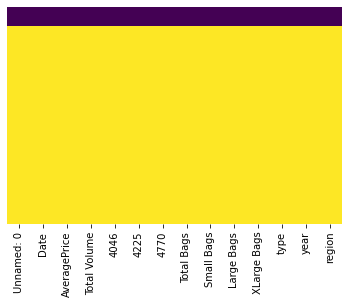

In [66]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# dropping the null values

In [67]:
df.dropna

<bound method DataFrame.dropna of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0             0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1             1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2             2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3             3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4             4.0  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
16463         NaN         NaN           NaN           NaN      NaN        NaN   
16464         NaN         NaN           NaN           NaN      NaN        NaN   
16465         NaN         NaN           NaN           NaN      NaN        NaN   
16466         NaN         NaN           NaN           NaN      NaN        NaN   
16467         NaN         NaN           NaN           NaN      NaN        N

In [68]:
df.dropna(inplace=True)

In [69]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# We have 16468 rows and 14 columns in dataset

In [70]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


<AxesSubplot:>

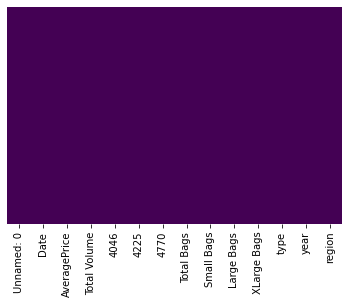

In [71]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# No more missing values present in the dataset

In [72]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

# We have float type value and object type value in the dataset and AveragePrice is our target variable.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [74]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# dropping the Unnamed column from the dataset

In [75]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [76]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58])

In [77]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# splitting the date to day and month for further analysis.

In [78]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


# Here we have added two more columns month and day 

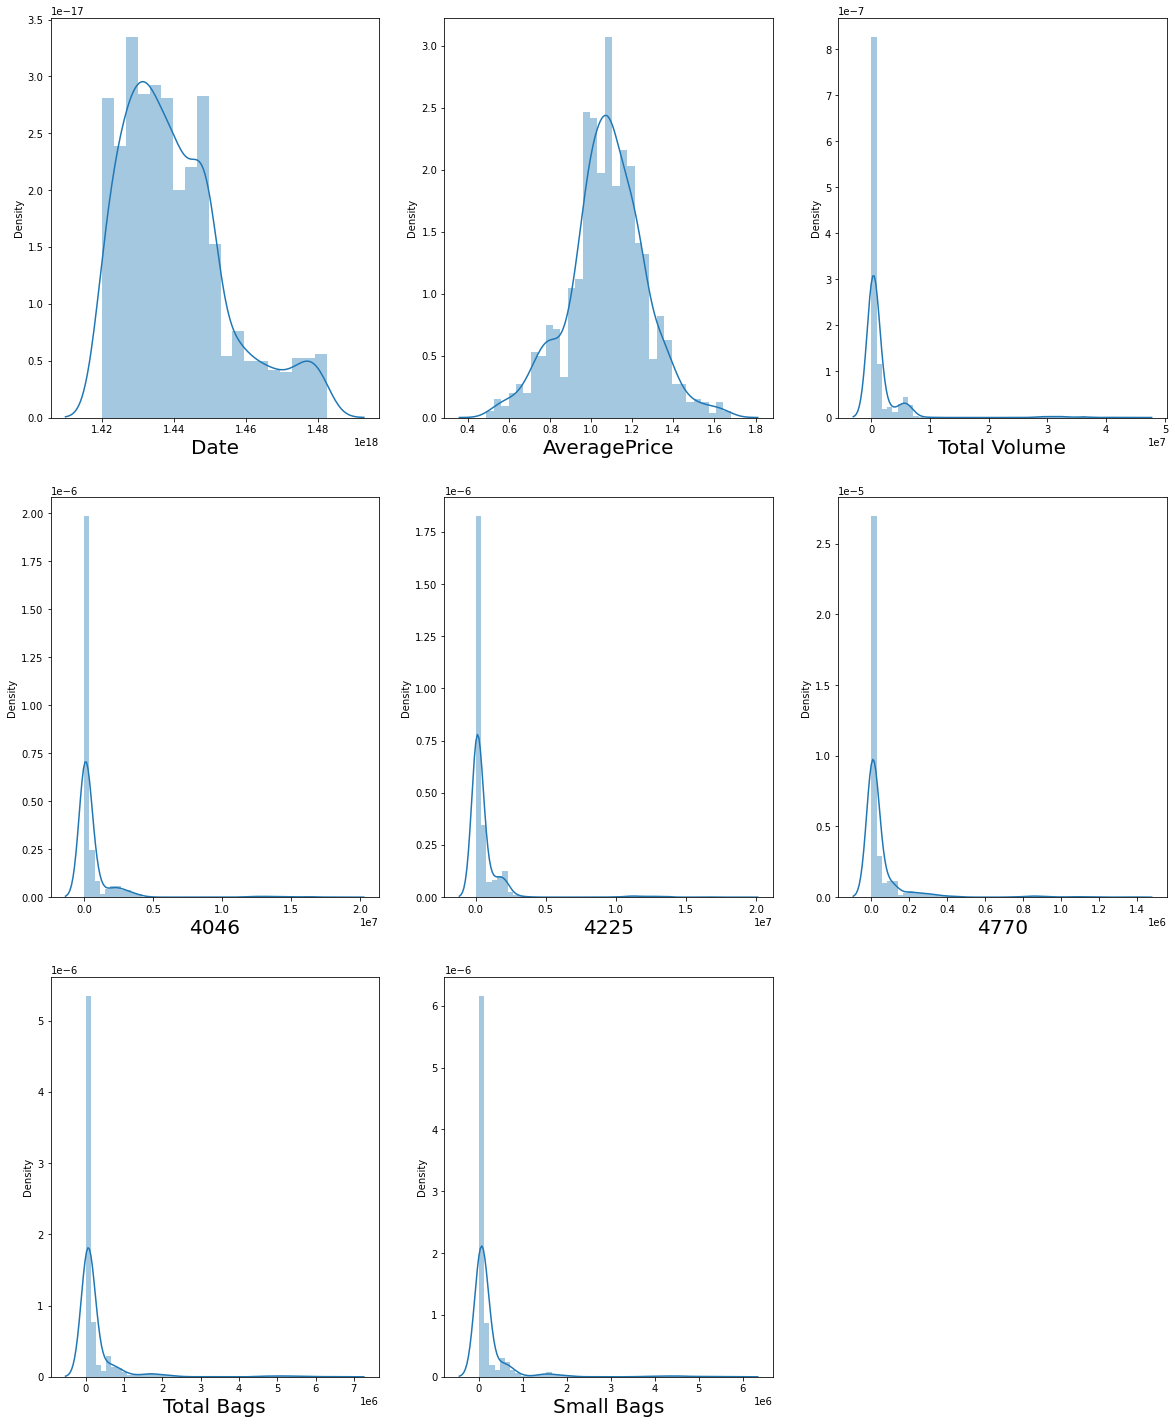

In [79]:
#Lets see how the data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=8: # asthere are 8 columns in the dataset.
        ax = plt.subplot(3,3, plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    
    plotnumber+=1
plt.show()

# Univariate analysis

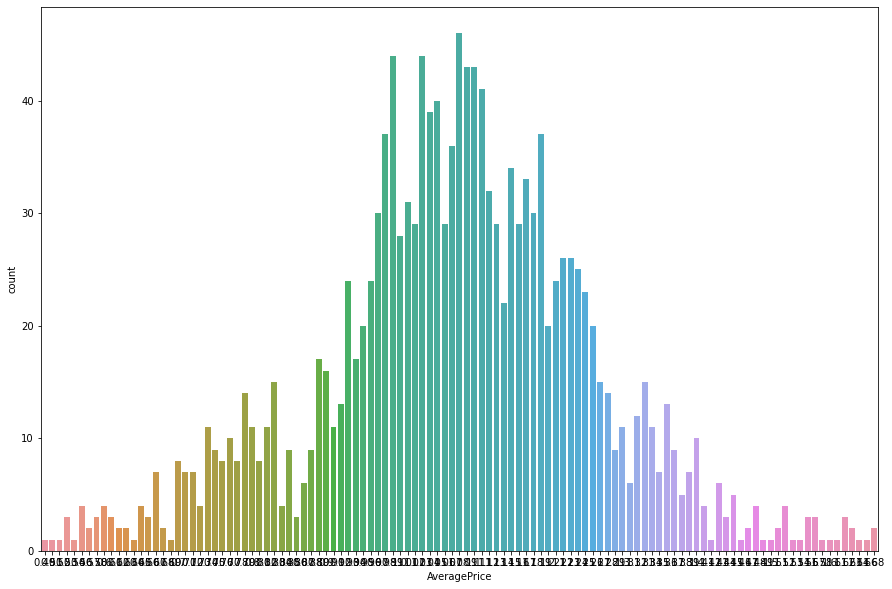

In [80]:
plt.figure(figsize=(15,10))
sn.countplot(df['AveragePrice'])
plt.show()

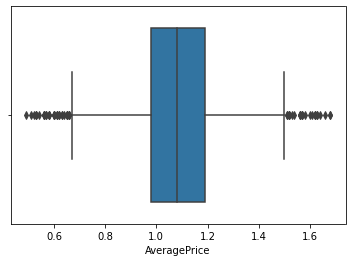

In [81]:
sn.boxplot(df['AveragePrice'])
plt.show()

# Bivariate analysis

# Analysis of Average Prices

Text(0.5, 1.0, 'Average Price')

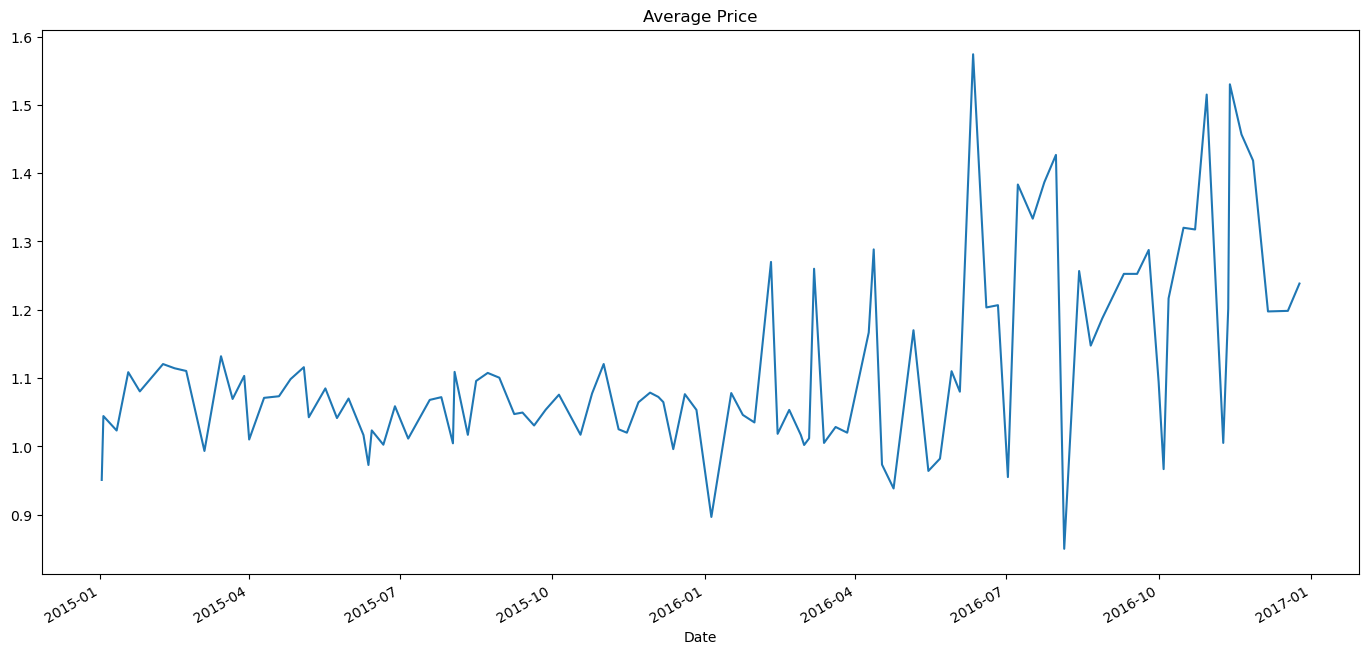

In [82]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

# the plot shows the average price of avocado at various points of time(Date)

Text(0.5, 1.0, 'Average Price Per Month')

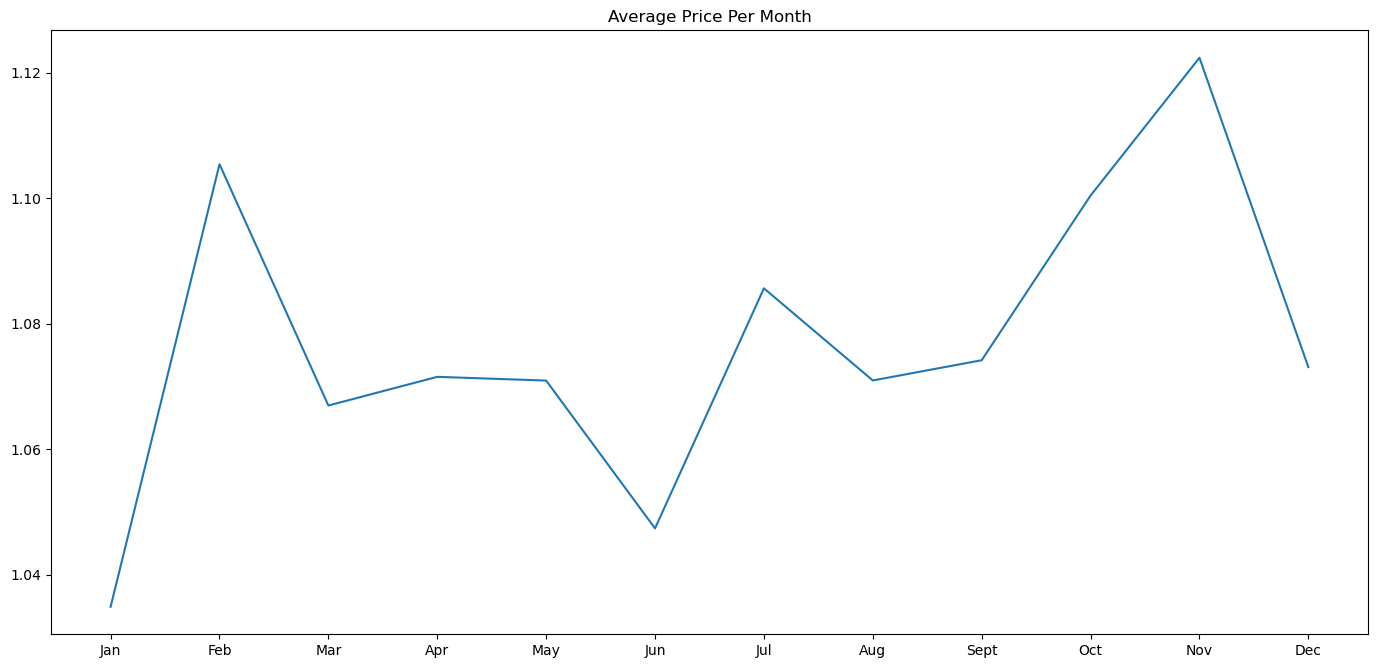

In [83]:
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

# From the above graph plotted for average price of avocado per month, we can observe that the price rises for a while from January to Feb then it falls in March and then in the month of June, it witnesses a rise in the average price. This rise reaches its zenith in the month of November and henceforth it starts to fall.

Text(0.5, 1.0, 'Average Price Per Day')

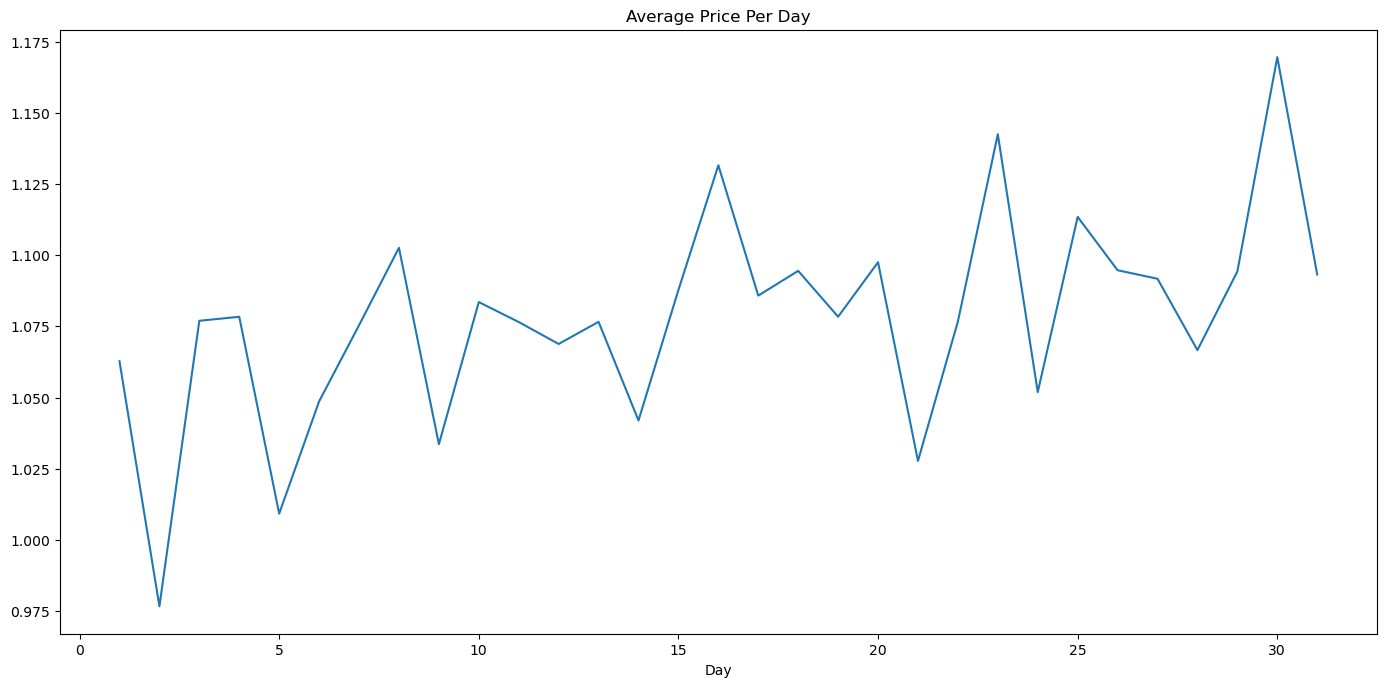

In [84]:
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

# The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.

Text(0.5, 1.0, 'Average Price According to Region')

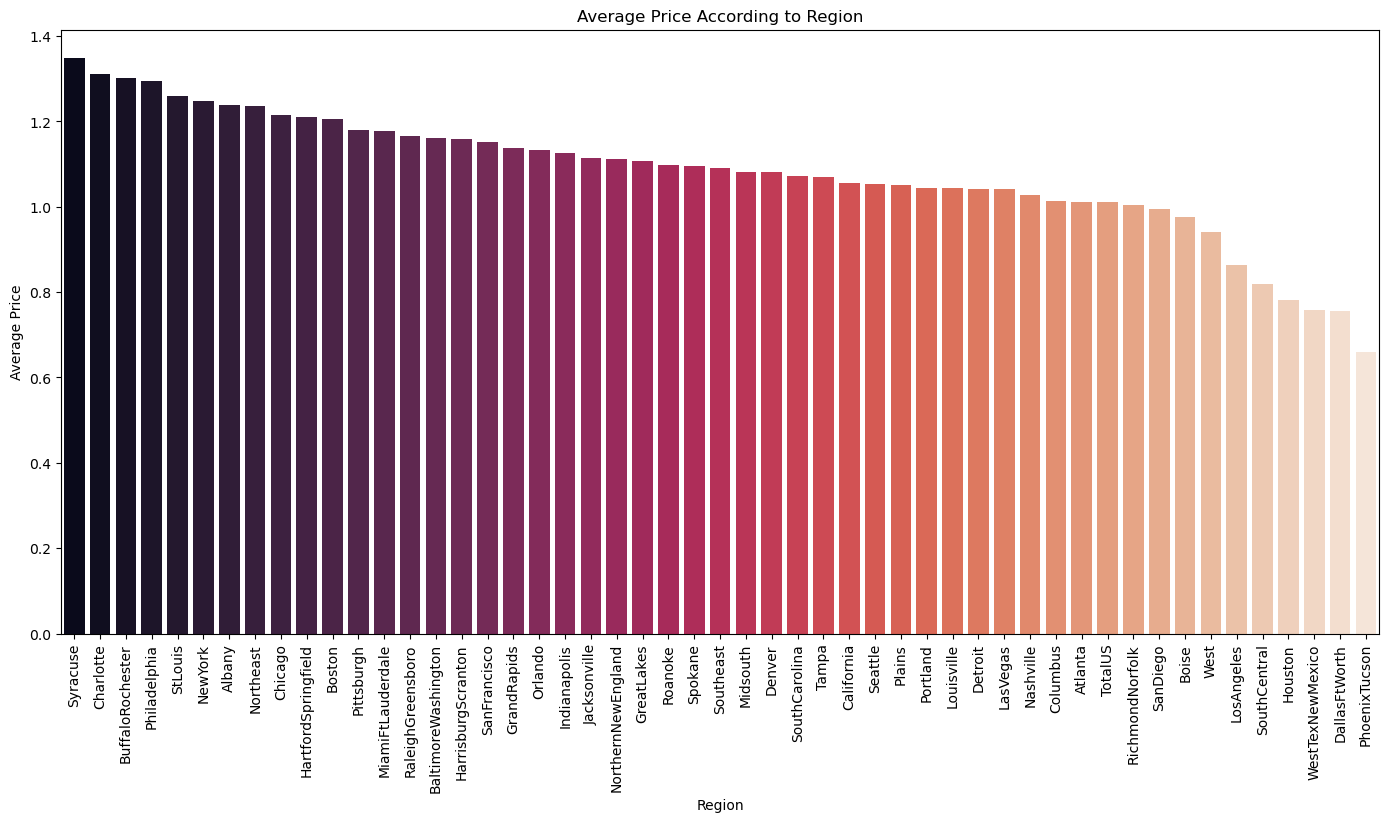

In [85]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sn.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

# The barplot shows the average price of avocado at various regions in a ascending order. Clearly Syracuse, Charlotte, buffaloRochester are the regions with the highest avocado prices.

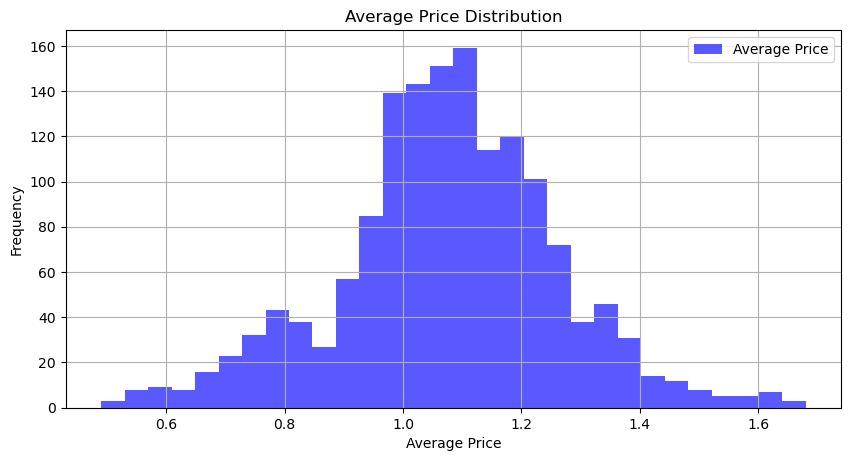

In [86]:
plt.figure(figsize=(10,5),dpi=100)
df["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

# The above histogram for the average price of avocado suggests that its distribution is somewhat positively skewed.

# Multivariate analysis

<Figure size 864x432 with 0 Axes>

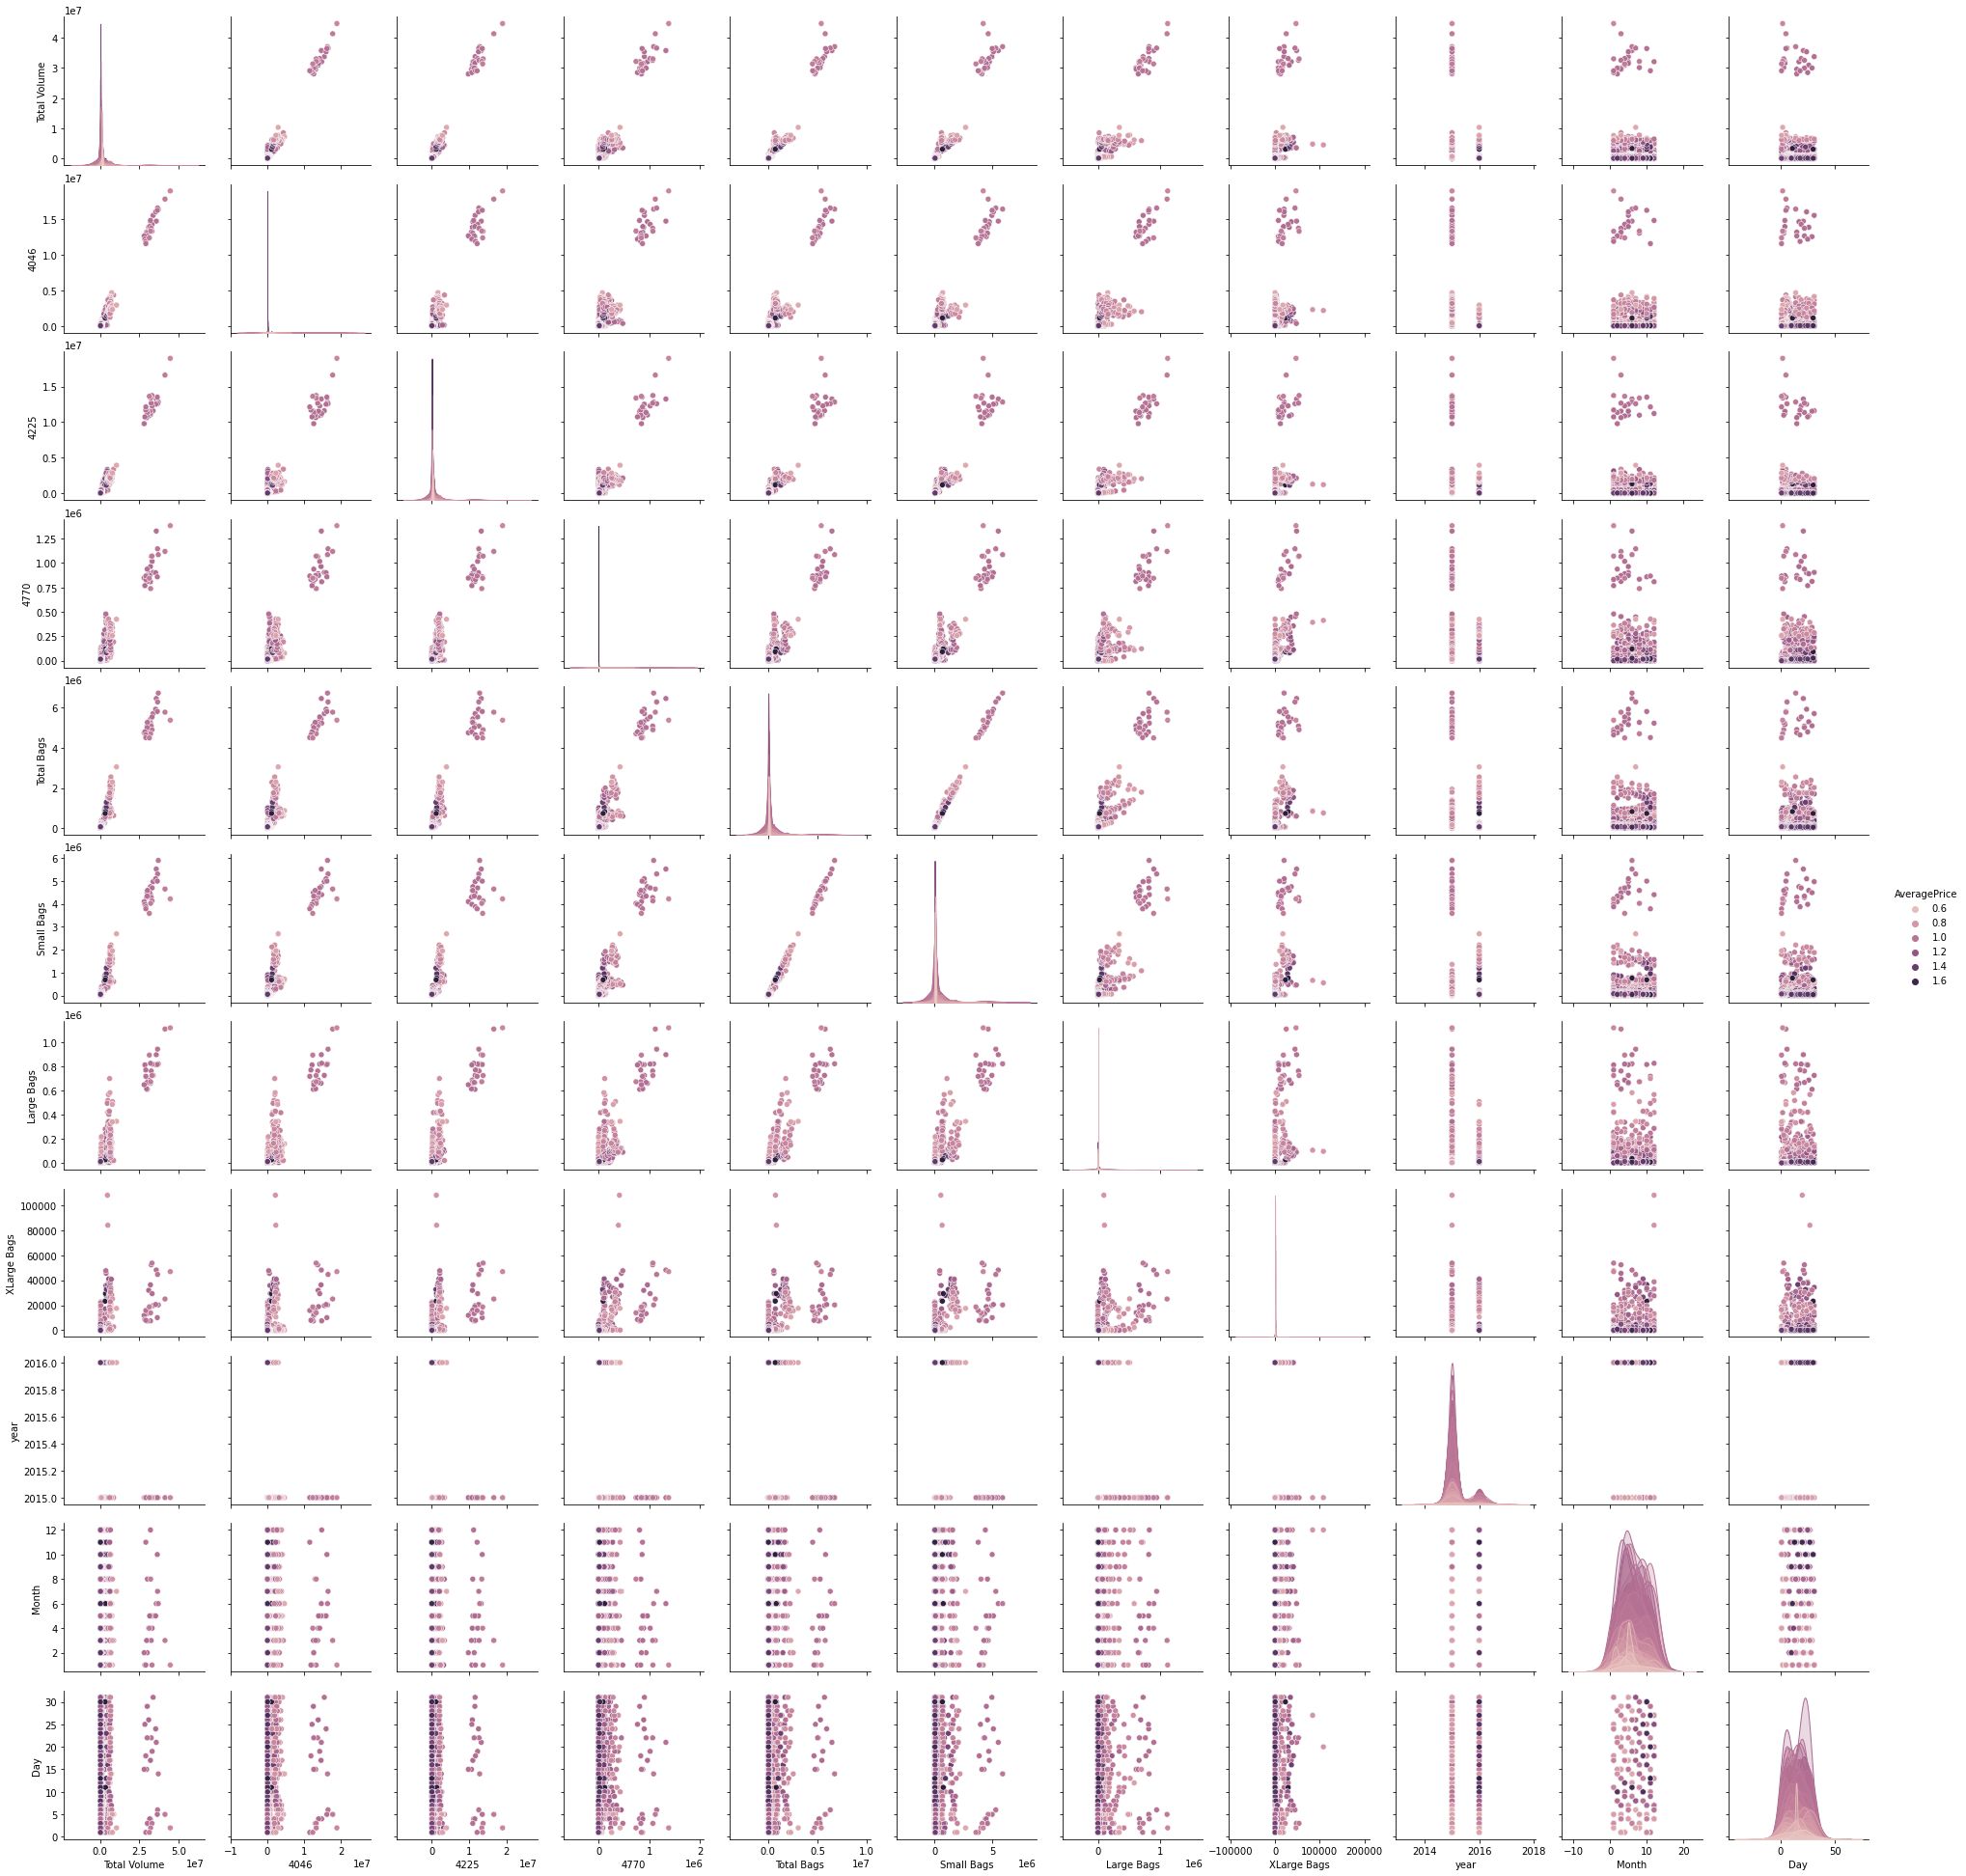

In [87]:
plt.figure(figsize=(12,6))
sn.pairplot(df,hue="AveragePrice")
plt.show()

from the above plots, we check the relationship between Average Price(dependent variable) and other feature(independent variable).

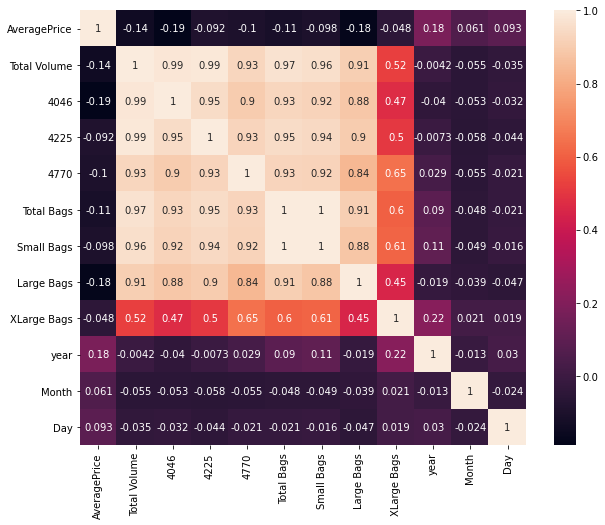

In [88]:
plt.figure(figsize=(10,8))
sn.heatmap(df.corr(), annot = True)
plt.show()

# As we can see from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.

# A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.

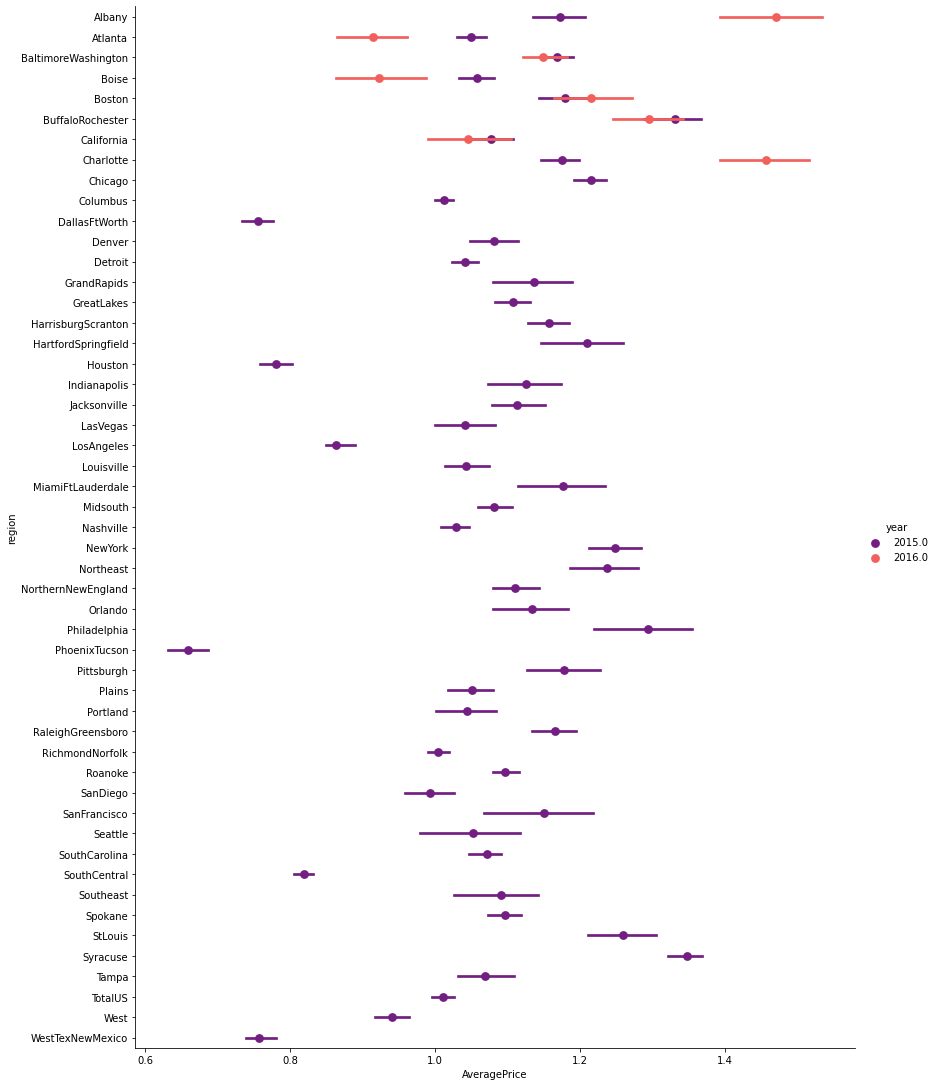

In [89]:
sn.factorplot('AveragePrice','region',data=df,hue='year',aspect=0.8,height=15,palette='magma',join=False)

# The above plot is a factor plot of average avocado price for different regions classified by year.

# Outlier Analysis

<AxesSubplot:>

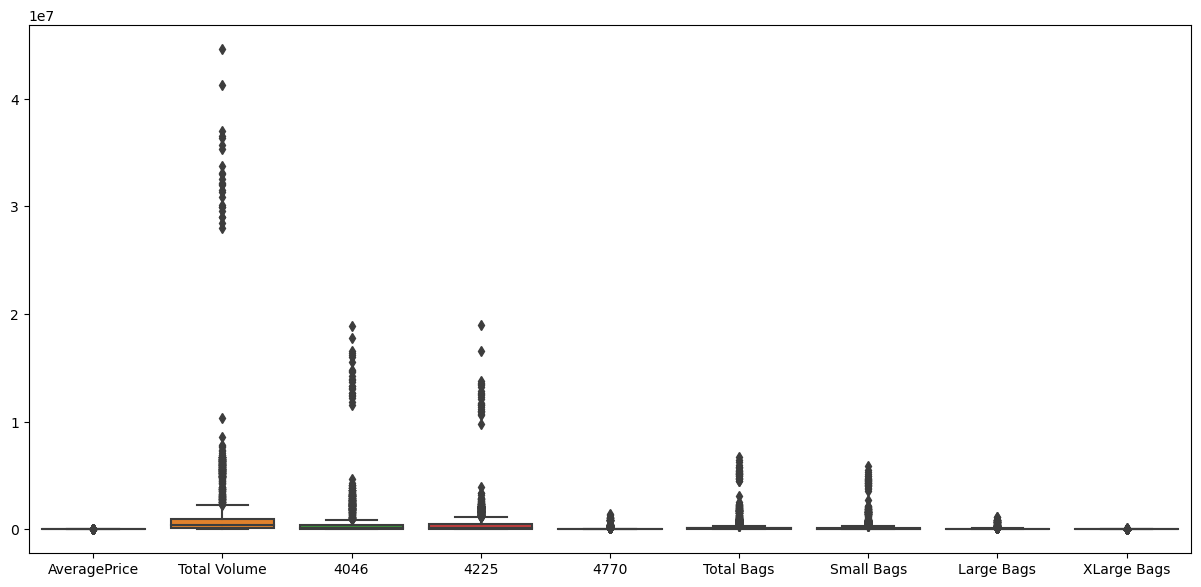

In [90]:
plt.figure(figsize=(15,7),dpi=100)
sn.boxplot(data = df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

# From the above, Clearly the boxplot indicates that all the variables contains outliers. So, Now we need to remove the outliers.

In [91]:
df.drop(columns=["Date"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   int64  
 13  Day           1517 non-null   int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 217.8+ KB


# Before we go on to taking care of the outliers we removed the "Date" variable from our dataset as it is useless now.

In [92]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
    #defining quartiles
            quartiles = percentile(df[j], [25,75])
    # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

# In the following code, we have replaced the outliers higer than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.

In [93]:
df.shape

(1517, 14)

# Before  1517,12
   After 1517, 14  

In [94]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


# from the above data we can see that, the Date is not required, So will drop that column.
Before that we will be assigning dummy values to the categorial columns such as type, month and region.

<AxesSubplot:>

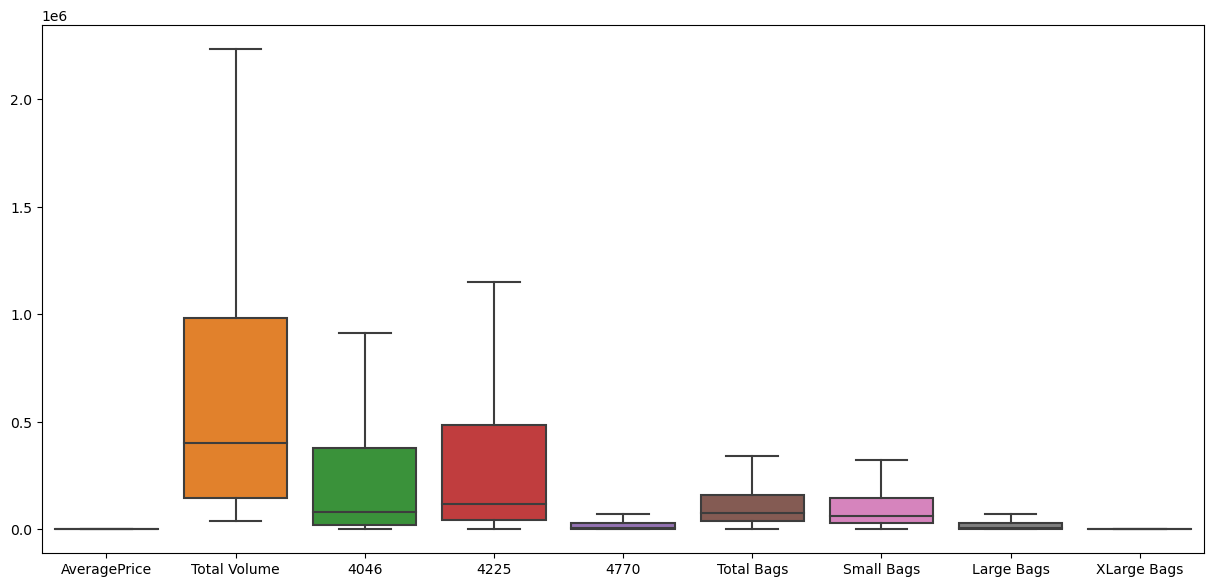

In [95]:
plt.figure(figsize=(15,7),dpi=100)
sn.boxplot(data = df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

# Now clearly our data is free from outliers. Now we can fit our data to appropriate models.

# To check Skewness

In [96]:
df.skew()

AveragePrice   -0.106022
Total Volume    1.176935
4046            1.212500
4225            1.220883
4770            1.170573
Total Bags      1.104160
Small Bags      1.166098
Large Bags      1.230728
XLarge Bags     1.178417
year            0.000000
Month           0.101439
Day             0.041303
dtype: float64

# Acceptable rangle for skewness value is +0.5 to -0.5
Outside of this range is highly skew.

# Now since our data contains categorical variables like type, month and region. we apply one-hot encoding to our variables region,month. 

In [97]:
df['region'] = pd.Categorical(df['region'])
dfDummies_region = pd.get_dummies(df['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df = pd.concat([df, dfDummies_region], axis=1)
df.drop(columns="region",inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.330,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.350,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.930,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.080,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.280,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.390,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,...,0,0,0,0,0,0,0,0,0,0
1513,1.505,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
1514,1.480,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,...,0,0,0,0,0,0,0,0,0,0
1515,1.470,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0


# Now adding the one hot encoded columns for region into our data and dropping the region column from our dataset.

In [99]:
df['Month'] = pd.Categorical(df['Month'])
dfDummies_month = pd.get_dummies(df['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,0,0,1,0,0
1513,0,0,0,0,0,0,0,0,1,0,0,0
1514,0,1,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,0,0,1,0,0,0


# Similarly applying one hot encoding on months.

In [100]:
df = pd.concat([df, dfDummies_month], axis=1)
df.drop(columns="Month",inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.330,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.350,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.930,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.080,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,...,0,0,0,1,0,0,0,0,0,0
4,1.280,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.390,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,...,0,0,0,0,0,0,0,1,0,0
1513,1.505,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,...,0,0,0,0,0,0,1,0,0,0
1514,1.480,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,...,0,0,0,0,0,0,0,0,0,0
1515,1.470,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,...,0,0,0,0,0,0,1,0,0,0


# Adding the one hot encoded columns for Month into our data and dropping the Month column from our dataset.

# applying label encoding to variable type.

In [108]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["type"]=LE.fit_transform(df["type"])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,type'
0,67,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,...,0,0,0,0,0,0,0,0,1,0
1,69,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,27,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,42,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,...,0,0,1,0,0,0,0,0,0,0
4,62,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,73,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,...,0,0,0,0,0,0,1,0,0,0
1513,85,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1514,82,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,...,0,0,0,0,0,0,0,0,0,0
1515,81,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,type'
0,67,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,69,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,27,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,42,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,62,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,1,0,0


# This is our Final Data.

# Data Preprocessing

In [110]:
X=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [111]:
# fitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =50)

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# The funtion regression_results defined below calculates and prints the following features of a model: explained_variance, r2, adjusted_r2, MAE, MSE, RMSE. 
It accepts the original and predicted values as its arguments.

In [113]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    
    mse=metrics.mean_squared_error(y_true, y_pred) 
    
    r2=metrics.r2_score(y_true, y_pred)
    
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

In [114]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Fitting Multiple Linear Regression Model

In [115]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.6947
R2:  0.6939
Adjusted_r2:  0.5933
MAE:  7.9237
MSE:  105.881
RMSE:  10.2898
Accuracy: 70.56 %
Standard Deviation: 4.04 %


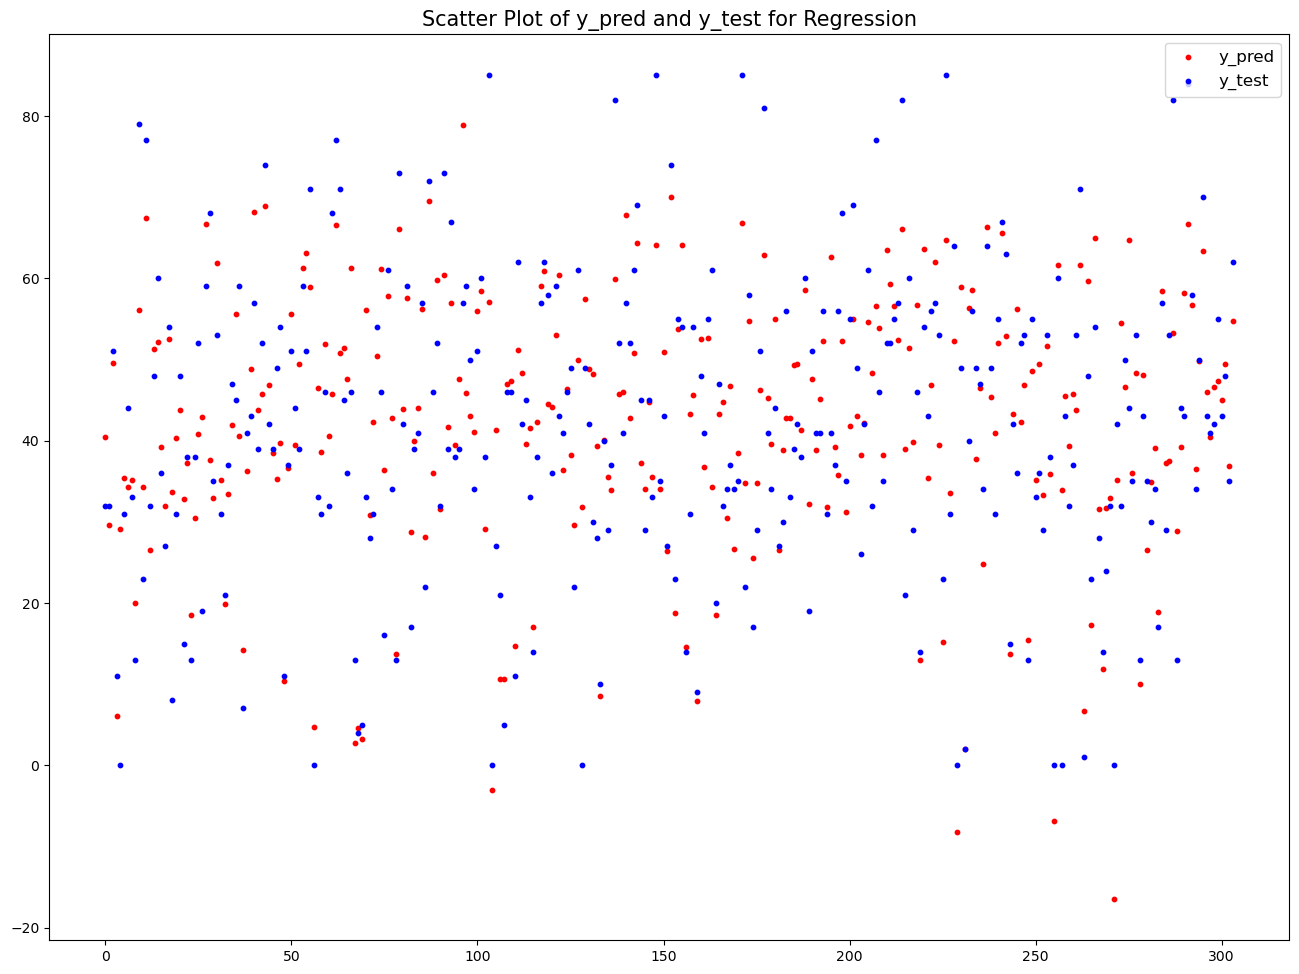

In [117]:
plt.figure(figsize=(16, 12),dpi=100)
red = plt.scatter(range(len(X_test)),y_pred,c='r',s = 10)
blue = plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

# Fitting Random Forest Regression Model

In [118]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(classifier)

Explained_variance:  0.7688
R2:  0.7686
Adjusted_r2:  0.6925
MAE:  6.5618
MSE:  80.0579
RMSE:  8.9475
Accuracy: 78.84 %
Standard Deviation: 3.82 %


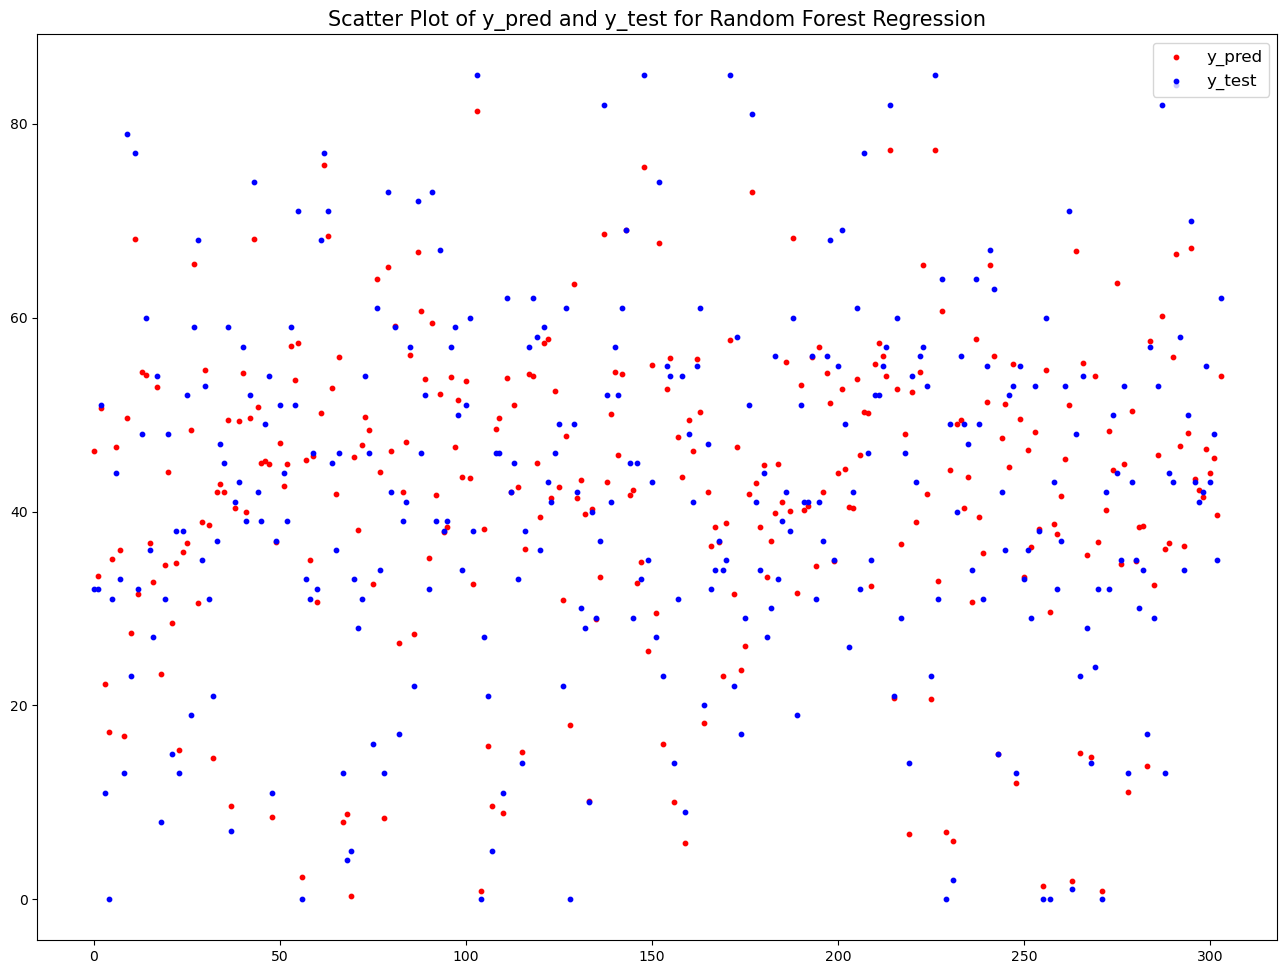

In [119]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_rf,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Random Forest Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

# Fitting Decision Tree Regression Model

In [120]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.6104
R2:  0.6048
Adjusted_r2:  0.4749
MAE:  8.1086
MSE:  136.7007
RMSE:  11.6919
Accuracy: 66.78 %
Standard Deviation: 7.44 %


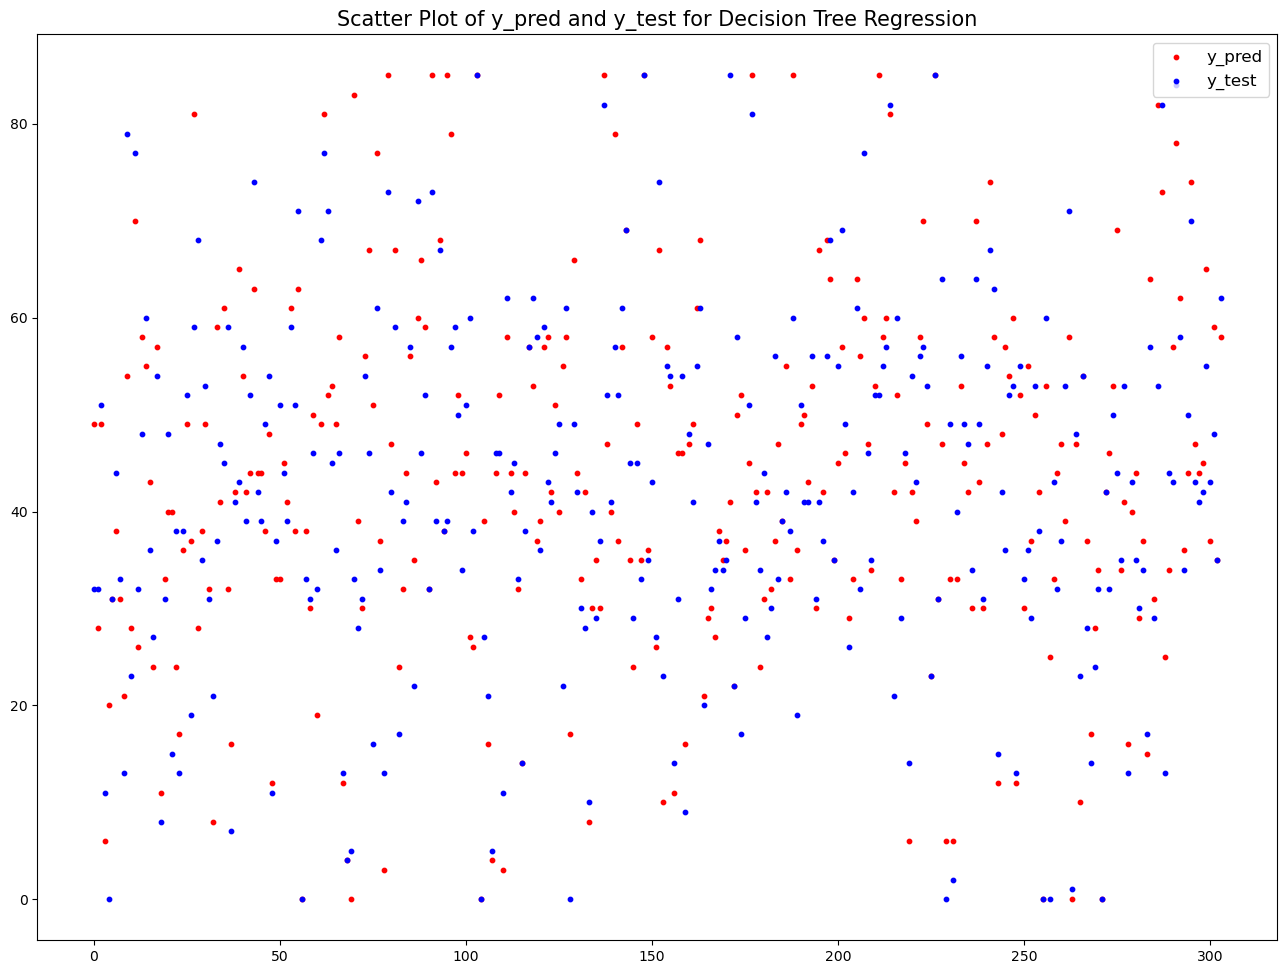

In [121]:
plt.figure(figsize=(16, 12),dpi=100)
red=plt.scatter(range(len(X_test)),y_pred_dt,c='r',s = 10)
blue=plt.scatter(range(len(X_test)),y_test,c='b', s = 10)
plt.title("Scatter Plot of y_pred and y_test for Decision Tree Regression",fontsize=15)
plt.legend((red,blue),("y_pred","y_test"),scatterpoints=1, loc='upper right',fontsize=12)

# Cross validation

In [125]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(regressor,X,y,cv=5).mean())

-2.9222898322274915


In [126]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(classifier,X,y,cv=5).mean())

0.18976232783596123


In [127]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(decision_tree,X,y,cv=5).mean())

-0.5113144120430404


# hence the random forest model is the best model.

# Hyperparameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV


In [143]:
param_dist={ "criterion":["gini","entropy"],
            "max_depth":[1,2,3,4,5,6,7,None]
}

In [144]:
classifier = RandomForestRegressor()

grid = GridSearchCV(estimator = classifier, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [145]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [147]:
grid.best_estimator_

RandomForestRegressor(n_estimators=9)

In [148]:
grid.best_score_

0.7456324173876198

In [149]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 9}

In [150]:
Final_mod = RandomForestRegressor()
Final_mod.fit(X_train, y_train)

RandomForestRegressor()

# Saving the model

In [151]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [152]:
mod=joblib.load("FinalModel.pkl")

In [153]:
print(mod.predict(X_test))

[47.57 35.22 49.5  21.99 18.77 35.11 46.54 35.55 16.41 51.3  27.62 68.52
 29.98 52.96 52.27 36.89 32.27 52.4  19.11 33.82 44.33 25.16 35.   14.93
 34.93 36.1  46.5  64.87 30.44 39.09 54.6  38.24 13.93 41.73 42.22 39.42
 49.07 11.1  40.72 47.72 52.66 41.1  49.33 66.52 47.26 44.47 45.17 43.76
  8.41 36.28 45.82 42.66 46.27 56.66 53.67 55.65  1.75 45.72 36.66 46.28
 33.9  50.12 75.1  69.05 52.83 39.99 56.44  6.92  8.24  0.58 42.11 37.62
 45.27 48.86 42.35 30.69 63.42 45.03  9.52 63.49 45.66 58.16 26.68 42.28
 51.13 56.08 25.23 68.31 61.93 53.81 35.35 63.18 40.19 54.14 36.16 40.09
 53.6  44.16 51.71 41.25 52.81 43.99 31.47 82.67  0.96 37.81 14.56  8.61
 48.76 52.19  8.69 53.59 44.87 50.58 43.44 14.28 36.52 51.89 53.11 46.74
 40.16 57.35 54.04 40.84 52.26 41.19 30.89 46.92 23.18 61.84 41.19 45.06
 37.26  9.47 40.42 28.56 33.95 70.5  43.85 50.56 53.01 47.29 55.13 66.95
 41.68 45.24 32.2  32.83 78.32 26.   55.59 28.86 65.93 15.58 52.83 56.12
 10.92 50.61 44.64  6.45 48.22 44.53 55.55 50.01 19